In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
friday_df = pd.read_csv('Communication Data/comm-data-Fri.csv')
saturday_df = pd.read_csv('Communication Data/comm-data-Sat.csv')
sunday_df = pd.read_csv('Communication Data/comm-data-Sun.csv')

In [3]:
friday_df['Timestamp'] = pd.to_datetime(friday_df['Timestamp'])
friday_df

,Timestamp,from,to,location
0,2014-06-06 08:03:19,439105,1053224,Kiddie Land
1,2014-06-06 08:03:19,439105,1696241,Kiddie Land
2,2014-06-06 08:03:19,439105,580064,Kiddie Land
3,2014-06-06 08:03:19,439105,1464748,Kiddie Land
4,2014-06-06 08:03:47,1836139,1593258,Entry Corridor
...,...,...,...,...
948734,2014-06-06 23:25:54,1778371,1527872,Entry Corridor
948735,2014-06-06 23:25:54,1778371,572089,Entry Corridor
948736,2014-06-06 23:25:54,1778371,802526,Entry Corridor
948737,2014-06-06 23:25:54,1778371,280592,Entry Corridor


In [4]:
saturday_df['Timestamp'] = pd.to_datetime(saturday_df['Timestamp'])
saturday_df

,Timestamp,from,to,location
0,2014-06-07 08:01:58,1003120,839736,Entry Corridor
1,2014-06-07 08:02:01,1743218,1202957,Entry Corridor
2,2014-06-07 08:02:39,1760095,external,Entry Corridor
3,2014-06-07 08:02:40,686125,839736,Entry Corridor
4,2014-06-07 08:02:45,2046019,269197,Entry Corridor
...,...,...,...,...
1655861,2014-06-07 23:34:26,1970153,1076581,Entry Corridor
1655862,2014-06-07 23:34:26,1970153,1692159,Entry Corridor
1655863,2014-06-07 23:34:34,1692159,453105,Entry Corridor
1655864,2014-06-07 23:35:18,1656838,453105,Entry Corridor


In [5]:
sunday_df['Timestamp'] = pd.to_datetime(sunday_df['Timestamp'])
sunday_df

,Timestamp,from,to,location
0,2014-06-08 08:01:05,1401601,839736,Kiddie Land
1,2014-06-08 08:01:16,1169163,600636,Entry Corridor
2,2014-06-08 08:01:16,1169163,1561994,Entry Corridor
3,2014-06-08 08:01:16,1169163,864634,Entry Corridor
4,2014-06-08 08:01:16,1169163,577530,Entry Corridor
...,...,...,...,...
1548719,2014-06-08 23:20:37,1983198,external,Tundra Land
1548720,2014-06-08 23:20:38,1555391,857616,Tundra Land
1548721,2014-06-08 23:21:04,839736,2022346,Entry Corridor
1548722,2014-06-08 23:22:05,839736,1109589,Entry Corridor


In [6]:
def return_df_loc_comm_count(df,loc):
    loc_df = df.loc[df['location'] == loc]
    loc_df = loc_df.groupby(pd.Grouper(key='Timestamp', freq='5min')).size()
    loc_df = loc_df.reset_index()
    loc_df.columns = ['Timestamp', 'count']
    return loc_df

In [7]:
friday_wet_count = return_df_loc_comm_count(friday_df,'Wet Land')
friday_coast_count = return_df_loc_comm_count(friday_df,'Coaster Alley')
friday_tundra_count = return_df_loc_comm_count(friday_df,'Tundra Land')
friday_entry_count = return_df_loc_comm_count(friday_df,'Entry Corridor')
friday_kiddie_count = return_df_loc_comm_count(friday_df,'Kiddie Land')
friday_wet_count

,Timestamp,count
0,2014-06-06 08:10:00,6
1,2014-06-06 08:15:00,298
2,2014-06-06 08:20:00,425
3,2014-06-06 08:25:00,684
4,2014-06-06 08:30:00,824
...,...,...
177,2014-06-06 22:55:00,45
178,2014-06-06 23:00:00,35
179,2014-06-06 23:05:00,38
180,2014-06-06 23:10:00,30


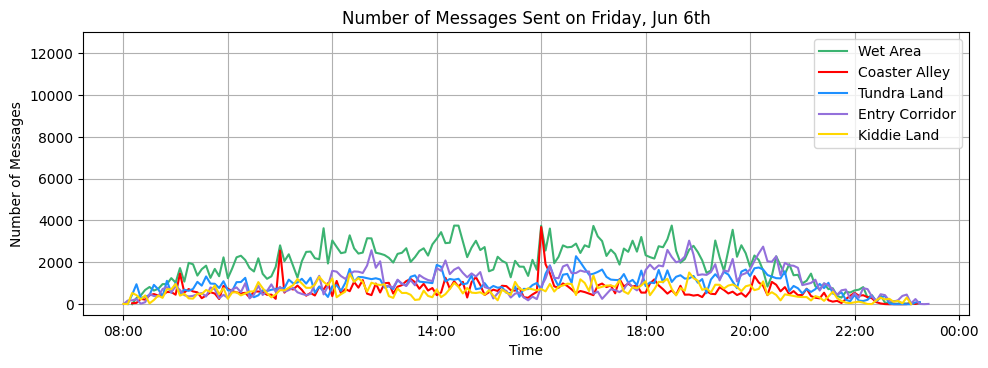

In [49]:
plt.figure(figsize=(10, 4))

plt.plot(friday_wet_count['Timestamp'], friday_wet_count['count'], linestyle = 'solid',color= 'mediumseagreen', label='Wet Area')
plt.plot(friday_coast_count['Timestamp'], friday_coast_count['count'], linestyle = 'solid',color='red', label='Coaster Alley')
plt.plot(friday_tundra_count['Timestamp'], friday_tundra_count['count'], linestyle = 'solid',color='dodgerblue', label='Tundra Land')
plt.plot(friday_entry_count['Timestamp'], friday_entry_count['count'], linestyle = 'solid',color='mediumpurple', label='Entry Corridor')
plt.plot(friday_kiddie_count['Timestamp'], friday_kiddie_count['count'], linestyle = 'solid',color='gold', label='Kiddie Land')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Number of Messages')
plt.title('Number of Messages Sent on Friday, Jun 6th')

plt.grid(True) # Show grid (optional for line charts)

# Set y scale
plt.ylim(-500, 13000)

plt.legend()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.tight_layout()
plt.subplots_adjust(bottom=0.2) # Add more space to the bottom to prevent x-axis label cutoff
plt.show()

In [9]:
saturday_wet_count = return_df_loc_comm_count(saturday_df,'Wet Land')
saturday_coast_count = return_df_loc_comm_count(saturday_df,'Coaster Alley')
saturday_tundra_count = return_df_loc_comm_count(saturday_df,'Tundra Land')
saturday_entry_count = return_df_loc_comm_count(saturday_df,'Entry Corridor')
saturday_kiddie_count = return_df_loc_comm_count(saturday_df,'Kiddie Land')

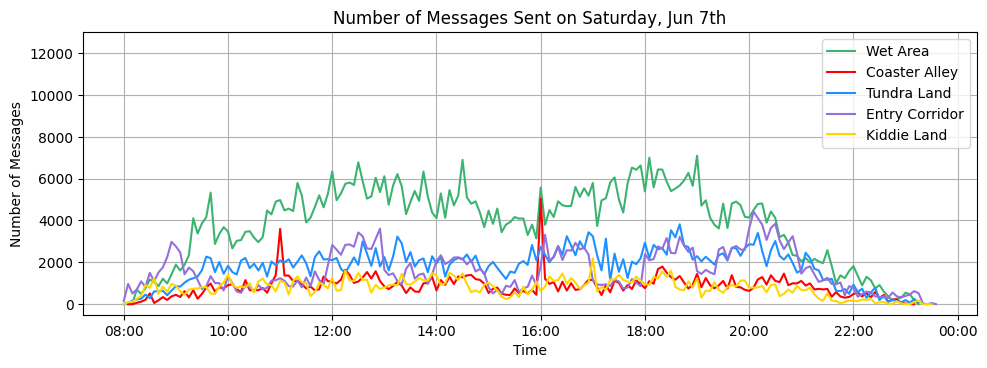

In [48]:
plt.figure(figsize=(10, 4))

plt.plot(saturday_wet_count['Timestamp'], saturday_wet_count['count'], linestyle = 'solid',color= 'mediumseagreen', label='Wet Area')
plt.plot(saturday_coast_count['Timestamp'], saturday_coast_count['count'], linestyle = 'solid',color='red', label='Coaster Alley')
plt.plot(saturday_tundra_count['Timestamp'], saturday_tundra_count['count'], linestyle = 'solid',color='dodgerblue', label='Tundra Land')
plt.plot(saturday_entry_count['Timestamp'], saturday_entry_count['count'], linestyle = 'solid',color='mediumpurple', label='Entry Corridor')
plt.plot(saturday_kiddie_count['Timestamp'], saturday_kiddie_count['count'], linestyle = 'solid',color='gold', label='Kiddie Land')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Number of Messages')
plt.title('Number of Messages Sent on Saturday, Jun 7th')

plt.grid(True) # Show grid (optional for line charts)

# Set y scale
plt.ylim(-500, 13000)

plt.legend()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.tight_layout()
plt.subplots_adjust(bottom=0.2) # Add more space to the bottom to prevent x-axis label cutoff
plt.show()

In [11]:
sunday_wet_count = return_df_loc_comm_count(sunday_df,'Wet Land')
sunday_coast_count = return_df_loc_comm_count(sunday_df,'Coaster Alley')
sunday_tundra_count = return_df_loc_comm_count(sunday_df,'Tundra Land')
sunday_entry_count = return_df_loc_comm_count(sunday_df,'Entry Corridor')
sunday_kiddie_count = return_df_loc_comm_count(sunday_df,'Kiddie Land')

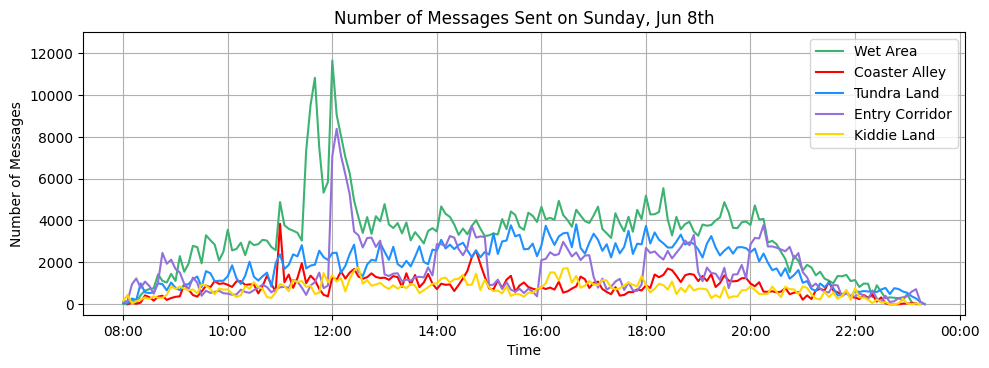

In [47]:
plt.figure(figsize=(10, 4))

plt.plot(sunday_wet_count['Timestamp'], sunday_wet_count['count'], linestyle = 'solid',color= 'mediumseagreen', label='Wet Area')
plt.plot(sunday_coast_count['Timestamp'], sunday_coast_count['count'], linestyle = 'solid',color='red', label='Coaster Alley')
plt.plot(sunday_tundra_count['Timestamp'], sunday_tundra_count['count'], linestyle = 'solid',color='dodgerblue', label='Tundra Land')
plt.plot(sunday_entry_count['Timestamp'], sunday_entry_count['count'], linestyle = 'solid',color='mediumpurple', label='Entry Corridor')
plt.plot(sunday_kiddie_count['Timestamp'], sunday_kiddie_count['count'], linestyle = 'solid',color='gold', label='Kiddie Land')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Number of Messages')
plt.title('Number of Messages Sent on Sunday, Jun 8th')

plt.grid(True) # Show grid (optional for line charts)

# Set y scale
plt.ylim(-500, 13000)

plt.legend()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.tight_layout()
plt.subplots_adjust(bottom=0.2) # Add more space to the bottom to prevent x-axis label cutoff
plt.show()